In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_excel(r"C:\Users\Naman jain\Downloads\Data_file (1).xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

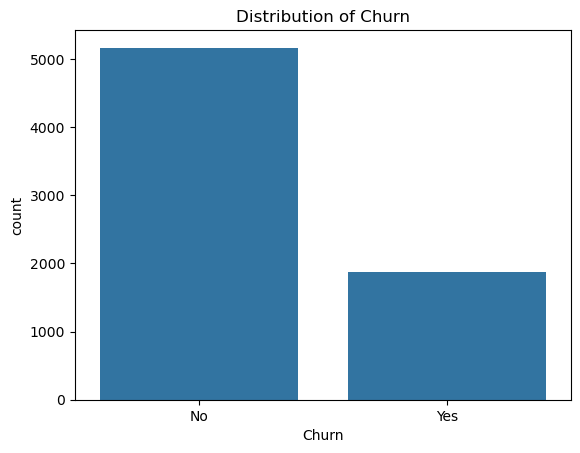

In [21]:
sns.countplot(x='Churn',data=df)
plt.title('Distribution of Churn')
plt.show()

In [26]:
df = df.drop(columns = ['customerID'])

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
for column in df.columns:
    print(column,df[column].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   

In [49]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Figure size 1500x1200 with 0 Axes>

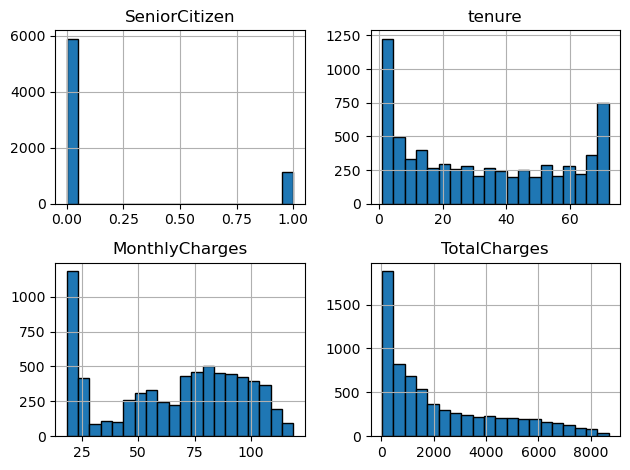

In [80]:
plt.figure(figsize=(15,12))
df.hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [82]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the first few rows after encoding
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [85]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Define features and target variable
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

In [93]:
print(f'Decision Tree Accuracy : {decision_tree_accuracy*100:.2f}%')
print('\nDecision Tree Classification Report')
print(classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy : 72.28%

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



In [98]:
def predict_churn():
    print("Enter the following customer details for churn prediction:")

    # Collect user inputs
    gender = int(input("Gender (0: Female, 1: Male): "))
    senior_citizen = int(input("Senior Citizen (0: No, 1: Yes): "))
    partner = int(input("Partner (0: No, 1: Yes): "))
    dependents = int(input("Dependents (0: No, 1: Yes): "))
    tenure = int(input("Tenure (Number of months): "))
    phone_service = int(input("Phone Service (0: No, 1: Yes): "))
    multiple_lines = int(input("Multiple Lines (0: No, 1: Yes, 2: No phone service): "))
    internet_service = int(input("Internet Service (0: DSL, 1: Fiber optic, 2: No): "))
    online_security = int(input("Online Security (0: No, 1: Yes, 2: No internet service): "))
    online_backup = int(input("Online Backup (0: No, 1: Yes, 2: No internet service): "))
    device_protection = int(input("Device Protection (0: No, 1: Yes, 2: No internet service): "))
    tech_support = int(input("Tech Support (0: No, 1: Yes, 2: No internet service): "))
    streaming_tv = int(input("Streaming TV (0: No, 1: Yes, 2: No internet service): "))
    streaming_movies = int(input("Streaming Movies (0: No, 1: Yes, 2: No internet service): "))
    contract = int(input("Contract (0: Month-to-month, 1: One year, 2: Two year): "))
    paperless_billing = int(input("Paperless Billing (0: No, 1: Yes): "))
    payment_method = int(input("Payment Method (0: Bank transfer, 1: Credit card, 2: Electronic check, 3: Mailed check): "))
    monthly_charges = float(input("Monthly Charges (in USD): "))
    total_charges = float(input("Total Charges (in USD): "))

    # Store inputs in a NumPy array
    user_data = np.array([[
        gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines,
        internet_service, online_security, online_backup, device_protection, tech_support,
        streaming_tv, streaming_movies, contract, paperless_billing, payment_method,
        monthly_charges, total_charges
    ]])

    # Predict churn
    prediction = decision.predict(user_data)[0]

    # Display result
    result = "Customer is likely to churn." if prediction == 1 else "Customer is not likely to churn."
    print("\nPrediction Result:", result)


predict_churn()


Enter the following customer details for churn prediction:


Gender (0: Female, 1: Male):  1
Senior Citizen (0: No, 1: Yes):  1
Partner (0: No, 1: Yes):  1
Dependents (0: No, 1: Yes):  0
Tenure (Number of months):  34
Phone Service (0: No, 1: Yes):  1
Multiple Lines (0: No, 1: Yes, 2: No phone service):  0
Internet Service (0: DSL, 1: Fiber optic, 2: No):  0
Online Security (0: No, 1: Yes, 2: No internet service):  0
Online Backup (0: No, 1: Yes, 2: No internet service):  1
Device Protection (0: No, 1: Yes, 2: No internet service):  0
Tech Support (0: No, 1: Yes, 2: No internet service):  1
Streaming TV (0: No, 1: Yes, 2: No internet service):  0
Streaming Movies (0: No, 1: Yes, 2: No internet service):  0
Contract (0: Month-to-month, 1: One year, 2: Two year):  1
Paperless Billing (0: No, 1: Yes):  0
Payment Method (0: Bank transfer, 1: Credit card, 2: Electronic check, 3: Mailed check):  3
Monthly Charges (in USD):  56.95
Total Charges (in USD):  1889.50	



Prediction Result: Customer is likely to churn.
